In [ ]:
# Ignore warnings
from __future__ import print_function
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imblearn
import sklearn
%matplotlib inline

# Settings
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', None)

sns.set(style='darkgrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load Data

In [ ]:
header = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'num_outbound_cmds', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML_Project/NSL_KDD-master/KDDTrain+_20Percent.txt', names=header)

In [ ]:
print('Data has {} rows & {} columns'.format(data.shape[0],data.shape[1]))
data.head()

Data has 25192 rows & 43 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Exploratory Analysis

In [ ]:
# Descriptive Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [ ]:
print(data['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [ ]:
# since num_outbound_cmds is a redundant colums, so remove it from dataset
data.drop(['num_outbound_cmds'], axis=1, inplace=True)
data.drop(['difficulty_level'], axis=1, inplace=True)

In [ ]:
# Attack class Distribution
data['attack_type'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
ftp_write              1
loadmodule             1
spy                    1
land                   1
Name: attack_type, dtype: int64

In [ ]:
for i in range(len(data['attack_type'])):
      if data['attack_type'][i] != 'normal':
        data['attack_type'][i] = 'anomaly'
    
data['attack_type'].value_counts()

normal     13449
anomaly    11743
Name: attack_type, dtype: int64

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
Y = Y.reshape(-1,1)
print([X.shape, Y.shape])
Y

[(25192, 40), (25192, 1)]


array([['normal'],
       ['normal'],
       ['anomaly'],
       ...,
       ['anomaly'],
       ['anomaly'],
       ['anomaly']], dtype=object)

# Encoding Categorical Attributes

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])

Y = encoder.fit_transform(Y).reshape(-1,1)
X.shape, Y.shape
Y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate']

In [ ]:
data_x = pd.DataFrame(X,columns=cols)
data_y = pd.DataFrame(Y)
data_y

,0
0,1
1,1
2,0
3,1
4,1
...,...
25187,0
25188,0
25189,0
25190,0


# Feature Selection

                             duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.084864   0.013258 -0.001012   
src_bytes                    0.084864   1.000000   0.003611 -0.000090   
dst_bytes                    0.013258   0.003611   1.000000 -0.000350   
land                        -0.001012  -0.000090  -0.000350  1.000000   
wrong_fragment              -0.010358  -0.000916  -0.003586 -0.000813   
urgent                      -0.000486  -0.000062   0.000345 -0.000056   
hot                          0.004202   0.000995   0.002539 -0.000819   
num_failed_logins            0.011108  -0.000260   0.005197 -0.000234   
logged_in                   -0.063703  -0.002040   0.012704 -0.007196   
num_compromised              0.095215  -0.000196   0.035852 -0.000195   
root_shell                   0.050547  -0.000383   0.020214 -0.000351   
su_attempted                 0.094243  -0.000267   0.035041 -0.000247   
num_root                     0.094066  -0.000209   

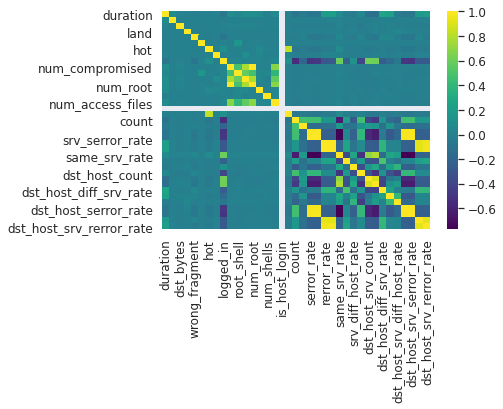

In [ ]:
corr_matrix = data.corr(method='pearson')
print(corr_matrix)
sns.heatmap(corr_matrix,cmap='viridis')

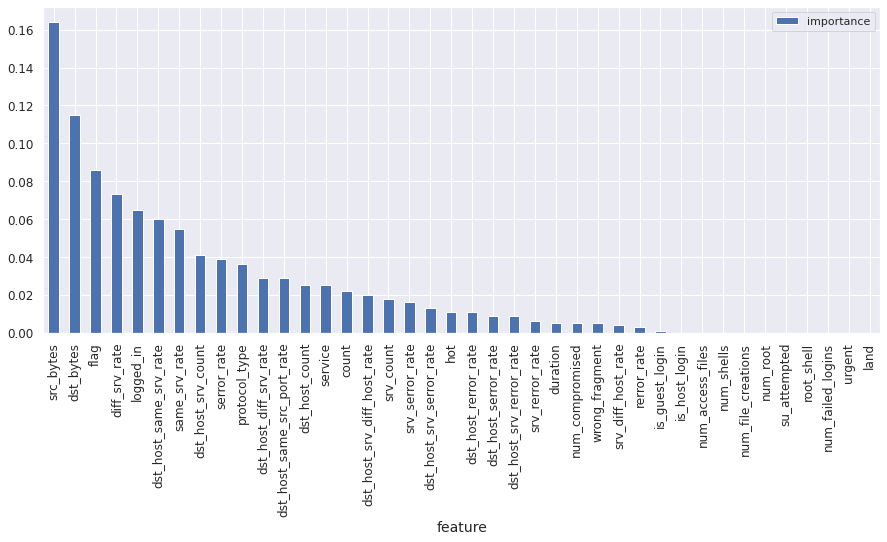

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_x,data_y)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':data_x.columns, 'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (15,6)
importances.plot.bar()

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select = 15)
rfe = rfe.fit(data_x, data_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), data_x.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [ ]:
X = data_x[selected_features]
X.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,1,19,9,491,0,0,2,2,1,0,25,0.17,0.03,0.17,0
1,2,41,9,146,0,0,13,1,0.08,0.15,1,0,0.6,0.88,0
2,1,46,5,0,0,0,123,6,0.05,0.07,26,0.1,0.05,0,0
3,1,22,9,232,8153,1,5,5,1,0,255,1,0,0.03,0.04
4,1,22,9,199,420,1,30,32,1,0,255,1,0,0,0


# Dataset Partition

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print([X_train.shape, X_test.shape, Y_train.shape, Y_test.shape])

[(17634, 15), (7558, 15), (17634, 1), (7558, 1)]


In [ ]:
# for RNN
X_tr = X_train.to_numpy().reshape(X_train.shape[0],X_train.shape[1], 1)
X_te = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1], 1)
X_tr.shape, X_te.shape

((17634, 15, 1), (7558, 15, 1))

# Scaling Numerical Attributes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((17634, 15), (7558, 15))

# Fitting Models


In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,LSTM,Input,Embedding
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from keras.utils.vis_utils import plot_model

In [ ]:
acc_score_evaluate = []
acc_score_validation = []

# RNN


In [ ]:
def RNN(unit1, lr):
  inputs = Input(shape=(15,1), name='Input_Layer')

  layer = LSTM(units=unit1, dropout=0.2, recurrent_dropout=0.2, name='LSTM_Layer')(inputs)
  layer = Dropout(0.5, name='LSTM_Dropout')(layer)

  outputs = Dense(units=1, activation='sigmoid', name='Output_Layer')(layer)
  
  model = Model(inputs, outputs,name='RNN')
  model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
params = [[20, 0.01], [20, 0.1], [20, 0.5], [60, 0.01], [60, 0.1], [60, 0.5],
          [80, 0.01], [80, 0.1], [80, 0.5], [120, 0.01], [120, 0.1], [120, 0.5],
          [240, 0.01], [240, 0.1], [240, 0.5]]

In [ ]:
model_rnn = []

In [ ]:
for i in range(len(params)):
  model_rnn.append(RNN(params[i][0], params[i][1]))
  model_rnn[i].summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 15, 1)             0         
_________________________________________________________________
LSTM_Layer (LSTM)            (None, 20)                1760      
_________________________________________________________________
LSTM_Dropout (Dropout)       (None, 20)                0         
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 15, 1)             0         
________________________________________________

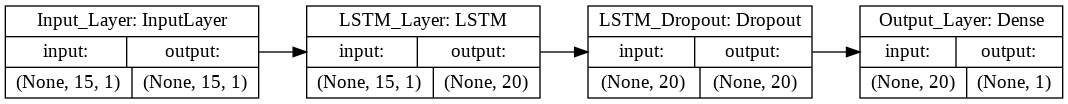

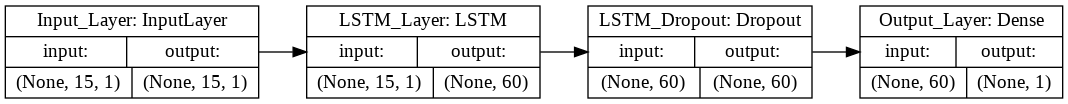

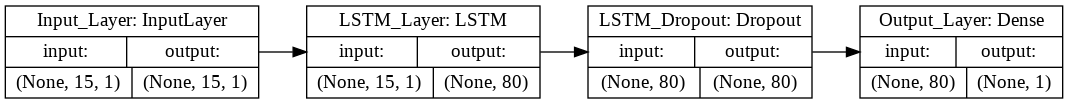

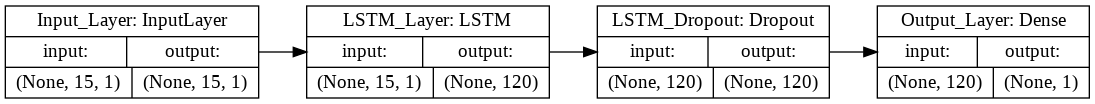

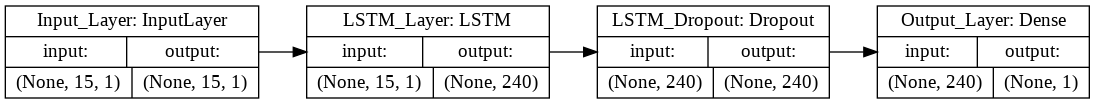

In [ ]:
from IPython.display import display
for i in range(0,len(params),3):
  img = keras.utils.plot_model(model_rnn[i], show_shapes=True, rankdir='LR')
  display(img)

In [ ]:
for i in range(0,len(params)):
  print(f'units: {params[i][0]} and learning rate: {params[i][1]}\n')
  print('-'*100)
  model_rnn[i].fit(X_tr, Y_train, batch_size=128,epochs=5)
  print('-'*100)
  print('\n\n')

units: 20 and learning rate: 0.01

----------------------------------------------------------------------------------------------------
Epoch 1/5
17634/17634 [==============================] - 2s 94us/step - loss: 0.2140 - accuracy: 0.8781
Epoch 2/5
17634/17634 [==============================] - 2s 94us/step - loss: 0.2127 - accuracy: 0.8802
Epoch 3/5
17634/17634 [==============================] - 2s 94us/step - loss: 0.2128 - accuracy: 0.8830
Epoch 4/5
17634/17634 [==============================] - 2s 98us/step - loss: 0.2163 - accuracy: 0.8768
Epoch 5/5
17634/17634 [==============================] - 2s 95us/step - loss: 0.2110 - accuracy: 0.8802
----------------------------------------------------------------------------------------------------



units: 20 and learning rate: 0.1

----------------------------------------------------------------------------------------------------
Epoch 1/5
17634/17634 [==============================] - 2s 93us/step - loss: 0.6703 - accuracy: 0.5839
E

In [ ]:
rnn_acc_train = []
rnn_acc_test = []

In [ ]:
for i in range(len(params)):
  score_rnn_eval = model_rnn[i].evaluate(X_tr, Y_train)
  rnn_acc_train.append([(params[i][0], params[i][1]), score_rnn_eval[1]])
  print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_eval[0],score_rnn_eval[1]))

17634/17634 [==============================] - 1s 77us/step
Loss: 0.072 
Accuracy: 0.979 
17634/17634 [==============================] - 1s 68us/step
Loss: 0.682 
Accuracy: 0.507 
17634/17634 [==============================] - 1s 63us/step
Loss: 0.664 
Accuracy: 0.697 
17634/17634 [==============================] - 2s 120us/step
Loss: 0.074 
Accuracy: 0.977 
17634/17634 [==============================] - 2s 98us/step
Loss: 0.627 
Accuracy: 0.681 
17634/17634 [==============================] - 2s 98us/step
Loss: 0.669 
Accuracy: 0.581 
17634/17634 [==============================] - 2s 114us/step
Loss: 0.092 
Accuracy: 0.969 
17634/17634 [==============================] - 2s 124us/step
Loss: 0.596 
Accuracy: 0.725 
17634/17634 [==============================] - 2s 119us/step
Loss: 0.647 
Accuracy: 0.655 
17634/17634 [==============================] - 3s 175us/step
Loss: 0.128 
Accuracy: 0.961 
17634/17634 [==============================] - 3s 173us/step
Loss: 0.464 
Accuracy: 0.784 
1763

In [ ]:
rnn_acc_train.sort(key=lambda rnn_acc_train: rnn_acc_train[1],reverse=True)
df = pd.DataFrame(rnn_acc_train,columns=['(Units, Learning)','Accuracy'])
df

,"(Units, Learning)",Accuracy
0,"(20, 0.01)",0.978621
1,"(60, 0.01)",0.976693
2,"(80, 0.01)",0.969377
3,"(240, 0.01)",0.964217
4,"(120, 0.01)",0.961098
5,"(120, 0.1)",0.783770
6,"(80, 0.1)",0.725417
7,"(20, 0.5)",0.696892
8,"(60, 0.1)",0.680504
9,"(80, 0.5)",0.655268


In [ ]:
best_params = df['(Units, Learning)'][0]
best_score = df['Accuracy'][0]
best_params, best_score

((20, 0.01), 0.9786208271980286)

In [ ]:
acc_score_evaluate.append([f'RNN Classifier ({best_params})', best_score])

In [ ]:
for i in range(len(params)):
  score_rnn_val = model_rnn[i].evaluate(X_te, Y_test)
  rnn_acc_test.append([(params[i][0], params[i][1]), score_rnn_val[1]])
  print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_val[0],score_rnn_val[1]))

7558/7558 [==============================] - 0s 65us/step
Loss: 0.070 
Accuracy: 0.980 
7558/7558 [==============================] - 0s 59us/step
Loss: 0.682 
Accuracy: 0.513 
7558/7558 [==============================] - 0s 63us/step
Loss: 0.663 
Accuracy: 0.700 
7558/7558 [==============================] - 1s 97us/step
Loss: 0.066 
Accuracy: 0.979 
7558/7558 [==============================] - 1s 102us/step
Loss: 0.622 
Accuracy: 0.688 
7558/7558 [==============================] - 1s 106us/step
Loss: 0.671 
Accuracy: 0.575 
7558/7558 [==============================] - 1s 116us/step
Loss: 0.084 
Accuracy: 0.973 
7558/7558 [==============================] - 1s 123us/step
Loss: 0.596 
Accuracy: 0.725 
7558/7558 [==============================] - 1s 124us/step
Loss: 0.636 
Accuracy: 0.668 
7558/7558 [==============================] - 1s 170us/step
Loss: 0.110 
Accuracy: 0.966 
7558/7558 [==============================] - 1s 174us/step
Loss: 0.456 
Accuracy: 0.790 
7558/7558 [==============

In [ ]:
rnn_acc_test.sort(key=lambda rnn_acc_test: rnn_acc_test[1],reverse=True)
df = pd.DataFrame(rnn_acc_test,columns=['(Units, Learning)','Accuracy'])
df

,"(Units, Learning)",Accuracy
0,"(20, 0.01)",0.980286
1,"(60, 0.01)",0.978830
2,"(80, 0.01)",0.973009
3,"(240, 0.01)",0.967716
4,"(120, 0.01)",0.966129
5,"(120, 0.1)",0.789759
6,"(80, 0.1)",0.724795
7,"(20, 0.5)",0.699788
8,"(60, 0.1)",0.687880
9,"(80, 0.5)",0.667637


In [ ]:
best_params = df['(Units, Learning)'][0]
best_score = df['Accuracy'][0]
best_params, best_score

((20, 0.01), 0.9802857637405396)

In [ ]:
acc_score_validation.append([f'RNN Classifier ({best_params})', best_score])

In [ ]:
for i in range(len(params)):
  print(f'[Units, Learning] = {params[i]}\n\ncm = ',metrics.confusion_matrix(Y_test, model_rnn[i].predict(X_te).round()))
  print('\n')

[Units, Learning] = [20, 0.01]

cm =  [[3384  132]
 [  17 4025]]


[Units, Learning] = [20, 0.1]

cm =  [[3029  487]
 [3197  845]]


[Units, Learning] = [20, 0.5]

cm =  [[1459 2057]
 [ 212 3830]]


[Units, Learning] = [60, 0.01]

cm =  [[3396  120]
 [  40 4002]]


[Units, Learning] = [60, 0.1]

cm =  [[2291 1225]
 [1134 2908]]


[Units, Learning] = [60, 0.5]

cm =  [[ 996 2520]
 [ 692 3350]]


[Units, Learning] = [80, 0.01]

cm =  [[3351  165]
 [  39 4003]]


[Units, Learning] = [80, 0.1]

cm =  [[2467 1049]
 [1031 3011]]


[Units, Learning] = [80, 0.5]

cm =  [[2520  996]
 [1516 2526]]


[Units, Learning] = [120, 0.01]

cm =  [[3376  140]
 [ 116 3926]]


[Units, Learning] = [120, 0.1]

cm =  [[3437   79]
 [1510 2532]]


[Units, Learning] = [120, 0.5]

cm =  [[3516    0]
 [4042    0]]


[Units, Learning] = [240, 0.01]

cm =  [[3326  190]
 [  54 3988]]


[Units, Learning] = [240, 0.1]

cm =  [[ 123 3393]
 [  25 4017]]


[Units, Learning] = [240, 0.5]

cm =  [[3516    0]
 [4042    0]]



# ANN

In [ ]:
def ANN(unit1,unit2):
  inputs = Input(name='Input_Layer',shape=(15,))
  layer = Dense(units=unit1,activation='relu',name='Ist_hidden_layer')(inputs)
  layer = Dropout(0.5,name='Ist_dropout')(layer)
  layer = Dense(units=unit2,activation='relu',name='IInd_hidden_layer')(layer)
  layer = Dropout(0.5,name='IInd_dropout')(layer)
  outputs = Dense(1,activation='sigmoid',name='Output_Layer')(layer)
  model = Model(inputs, outputs)
  model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model_ann = ANN(60,40)
model_ann.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 15)                0         
_________________________________________________________________
Ist_hidden_layer (Dense)     (None, 60)                960       
_________________________________________________________________
Ist_dropout (Dropout)        (None, 60)                0         
_________________________________________________________________
IInd_hidden_layer (Dense)    (None, 40)                2440      
_________________________________________________________________
IInd_dropout (Dropout)       (None, 40)                0         
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 41        
Total params: 3,441
Trainable params: 3,441
Non-trainable params: 0
________________________________________________________

In [ ]:
model_ann.fit(X_train, Y_train,batch_size=128, epochs=100)

Epoch 1/100
17634/17634 [==============================] - 0s 26us/step - loss: 0.3299 - accuracy: 0.8734
Epoch 2/100
17634/17634 [==============================] - 0s 16us/step - loss: 0.1896 - accuracy: 0.9361
Epoch 3/100
17634/17634 [==============================] - 0s 15us/step - loss: 0.1676 - accuracy: 0.9466
Epoch 4/100
17634/17634 [==============================] - 0s 15us/step - loss: 0.1555 - accuracy: 0.9506
Epoch 5/100
17634/17634 [==============================] - 0s 14us/step - loss: 0.1463 - accuracy: 0.9532
Epoch 6/100
17634/17634 [==============================] - 0s 14us/step - loss: 0.1371 - accuracy: 0.9567
Epoch 7/100
17634/17634 [==============================] - 0s 14us/step - loss: 0.1315 - accuracy: 0.9593
Epoch 8/100
17634/17634 [==============================] - 0s 14us/step - loss: 0.1271 - accuracy: 0.9594
Epoch 9/100
17634/17634 [==============================] - 0s 14us/step - loss: 0.1271 - accuracy: 0.9621
Epoch 10/100
17634/17634 [====================

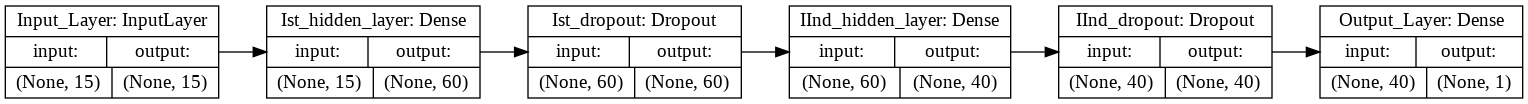

In [ ]:
plot_model(model_ann,'ann.png',show_shapes=True,rankdir='LR')

In [ ]:
score_ann_eval = model_ann.evaluate(X_train,Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_eval[0],score_ann_eval[1]))

17634/17634 [==============================] - 0s 21us/step
Loss: 0.036 
Accuracy: 0.987 


In [ ]:
score_ann_val = model_ann.evaluate(X_test,Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_val[0],score_ann_val[1]))

7558/7558 [==============================] - 0s 22us/step
Loss: 0.043 
Accuracy: 0.985 


In [ ]:
acc_score_evaluate.append(['ANN Classifier',score_ann_eval[1]])
acc_score_validation.append(['ANN Classifier',score_ann_val[1]])

In [ ]:
metrics.confusion_matrix(Y_test, model_ann.predict(X_test).round())

array([[3445,   71],
       [  44, 3998]])

# Keras Classifier with pipelining

In [ ]:
def create_model():
    inputs = Input(name='Input_Layer',shape=(15,))

    layer = Dense(units=60,activation='relu',name='Ist_hidden_layer')(inputs)
    layer = Dropout(0.5,name='Ist_dropout')(layer)

    layer = Dense(units=40,activation='relu',name='IInd_hidden_layer')(layer)
    layer = Dropout(0.5,name='IInd_dropout')(layer)
    
    outputs = Dense(1,activation='sigmoid',name='Output_Layer')(layer)

    model = Model(inputs, outputs)
    model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=100, batch_size=128, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
score_kcp = results.mean()
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: 98.25% (0.31%)


In [ ]:
acc_score_evaluate.append(['Keras Classifier', score_kcp])
acc_score_validation.append(['Keras Classifier', score_kcp])

# Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 30, 30), solver='adam', shuffle=False, tol = 0.0001, early_stopping = True)
clf_mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp_score_eval = clf_mlp.score(X_train, Y_train)

print('MLP_final Score: %.3f ' % mlp_score_eval)

MLP_final Score: 0.985 


In [ ]:
mlp_score_val = clf_mlp.score(X_test, Y_test)
print('MLP_final Score: %.3f ' % mlp_score_val)

MLP_final Score: 0.984 


In [ ]:
acc_score_evaluate.append(['MLP Classifier', mlp_score_eval])
acc_score_validation.append(['MLP Classifier', mlp_score_val])

In [ ]:
metrics.confusion_matrix(Y_test, clf_mlp.predict(X_test).round())

array([[3418,   98],
       [  22, 4020]])

# Different Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive Bayes Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train Random Forest Model
RFC_Classifier = RandomForestClassifier()
RFC_Classifier.fit(X_train, Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train SVM Model
svc_Classifier = SVC()
svc_Classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluate Models

In [ ]:
from sklearn import metrics

In [ ]:
models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', RFC_Classifier))
models.append(('KNeighbors Classifier', KNN_Classifier))
models.append(('Support Vector Classifier', svc_Classifier))
for i, v in models:
    
    scores = cross_val_score(v, X_train, Y_train, cv = 10)

    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    cm = metrics.confusion_matrix(Y_train, v.predict(X_train))
    ps = metrics.precision_score(Y_train, v.predict(X_train))
    rs = metrics.recall_score(Y_train, v.predict(X_train))
    fs = metrics.f1_score(Y_train, v.predict(X_train))
    cr = metrics.classification_report(Y_train, v.predict(X_train))
    acc_score_evaluate.append([i, accuracy])
    
    
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Precision Score: " "\n", ps)
    print()
    print("Recall Score: " "\n", rs)
    print()
    print("F-Score: " "\n", fs)
    print()
    print("Classification Report: " "\n", cr)
    print()


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.9423840135411321

Model Accuracy: 
 0.9426108653737099

Confusion Matrix: 
 [[7596  631]
 [ 381 9026]]

Precision Score: 
 0.9346587967277622

Recall Score: 
 0.9594982459870309

F-Score: 
 0.9469156525388166

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      8227
           1       0.93      0.96      0.95      9407

    accuracy                           0.94     17634
   macro avg       0.94      0.94      0.94     17634
weighted avg       0.94      0.94      0.94     17634



=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8863001506142257

Model Accuracy: 
 0.8862424861063853

Confusion Matrix: 
 [[6874 1353]
 [ 653 8754]]

Precision Score: 
 0.8661323834965865

Recall Score: 
 0.9305836079515255

F-Score: 
 0.8972020088141848

Classification Report: 
            

In [ ]:
!pip install texttable

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_row(['Model','Accuracy'])
t.add_rows(acc_score_evaluate,header=False)
print(t.draw())

+-----------------------------+----------+
| Model                       | Accuracy |
+-----------------------------+----------+
| RNN Classifier ((20, 0.01)) | 0.975    |
+-----------------------------+----------+
| RNN Classifier ((20, 0.01)) | 0.979    |
+-----------------------------+----------+
| ANN Classifier              | 0.987    |
+-----------------------------+----------+
| Keras Classifier            | 0.982    |
+-----------------------------+----------+
| MLP Classifier              | 0.985    |
+-----------------------------+----------+
| Logistic Regression         | 0.943    |
+-----------------------------+----------+
| Naive Bayes Classifier      | 0.886    |
+-----------------------------+----------+
| Decision Tree Classifier    | 1        |
+-----------------------------+----------+
| Random Forest Classifier    | 1        |
+-----------------------------+----------+
| KNeighbors Classifier       | 0.990    |
+-----------------------------+----------+
| Support V

In [ ]:
!pip install tabulate
from tabulate import tabulate
print(tabulate(acc_score_evaluate,headers=['Model','Accuracy'],stralign='left',numalign='center',floatfmt=".3f"))

Model                         Accuracy
---------------------------  ----------
RNN Classifier ((20, 0.01))    0.975
RNN Classifier ((20, 0.01))    0.979
ANN Classifier                 0.987
Keras Classifier               0.982
MLP Classifier                 0.985
Logistic Regression            0.943
Naive Bayes Classifier         0.886
Decision Tree Classifier       1.000
Random Forest Classifier       1.000
KNeighbors Classifier          0.990
Support Vector Classifier      0.979


# Validating Models

In [ ]:
for i, v in models:
    scores = cross_val_score(v, X_test, Y_test, cv = 10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    cm = metrics.confusion_matrix(Y_test, v.predict(X_test))
    ps = metrics.precision_score(Y_test, v.predict(X_test))
    rs = metrics.recall_score(Y_test, v.predict(X_test))
    fs = metrics.f1_score(Y_test, v.predict(X_test))
    cr = metrics.classification_report(Y_test, v.predict(X_test))
    acc_score_validation.append([i,accuracy])
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Precision Score: " "\n", ps)
    print()
    print("Recall Score: " "\n", rs)
    print()
    print("F-Score: " "\n", fs)
    print()
    print("Classification Report: " "\n", cr)


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.94403272714531

Model Accuracy: 
 0.9454882243979889

Confusion Matrix: 
 [[3271  245]
 [ 167 3875]]

Precision Score: 
 0.9405339805825242

Recall Score: 
 0.958683819891143

F-Score: 
 0.9495221759372703

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3516
           1       0.94      0.96      0.95      4042

    accuracy                           0.95      7558
   macro avg       0.95      0.94      0.95      7558
weighted avg       0.95      0.95      0.95      7558


=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8954723361014754

Model Accuracy: 
 0.8949457528446679

Confusion Matrix: 
 [[2988  528]
 [ 266 3776]]

Precision Score: 
 0.8773234200743495

Recall Score: 
 0.9341909945571499

F-Score: 
 0.9048646057991853

Classification Report: 
               p

In [ ]:
from texttable import Texttable
t = Texttable()
t.add_row(['Model','Accuracy'])
t.add_rows(acc_score_validation,header=False)
print(t.draw())

+-----------------------------+----------+
| Model                       | Accuracy |
+-----------------------------+----------+
| RNN Classifier ((60, 0.01)) | 0.978    |
+-----------------------------+----------+
| RNN Classifier ((20, 0.01)) | 0.980    |
+-----------------------------+----------+
| ANN Classifier              | 0.985    |
+-----------------------------+----------+
| Keras Classifier            | 0.982    |
+-----------------------------+----------+
| MLP Classifier              | 0.984    |
+-----------------------------+----------+
| Logistic Regression         | 0.945    |
+-----------------------------+----------+
| Naive Bayes Classifier      | 0.895    |
+-----------------------------+----------+
| Decision Tree Classifier    | 0.994    |
+-----------------------------+----------+
| Random Forest Classifier    | 0.998    |
+-----------------------------+----------+
| KNeighbors Classifier       | 0.986    |
+-----------------------------+----------+
| Support V

In [ ]:
print(tabulate(acc_score_validation,headers=['Model','Accuracy'],stralign='left',numalign='center',floatfmt=".3f"))

Model                         Accuracy
---------------------------  ----------
RNN Classifier ((60, 0.01))    0.978
RNN Classifier ((20, 0.01))    0.980
ANN Classifier                 0.985
Keras Classifier               0.982
MLP Classifier                 0.984
Logistic Regression            0.945
Naive Bayes Classifier         0.895
Decision Tree Classifier       0.994
Random Forest Classifier       0.998
KNeighbors Classifier          0.986
Support Vector Classifier      0.978


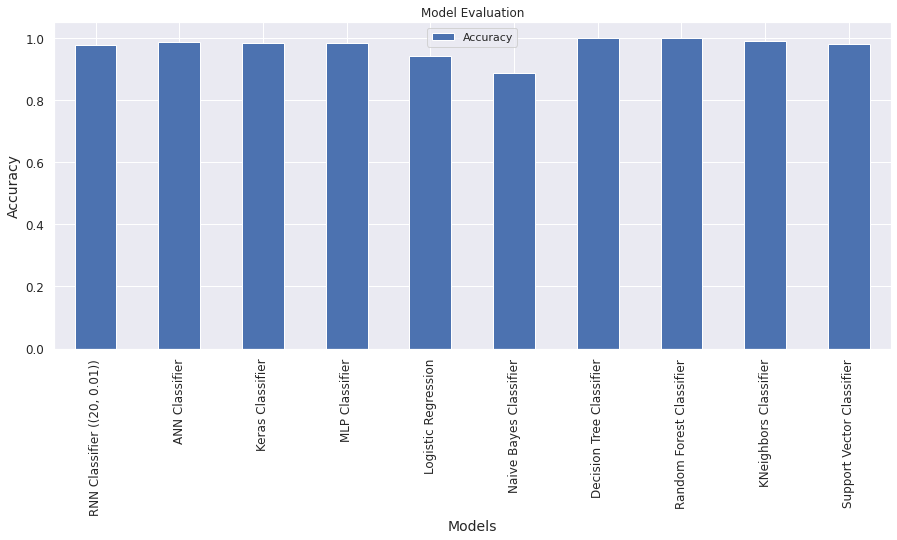

In [ ]:
df = pd.DataFrame(acc_score_evaluate[1:],columns=['Model','Accuracy'])
df_eval = df.set_index('Model')
ax = df_eval.plot(kind='bar', title='Model Evaluation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

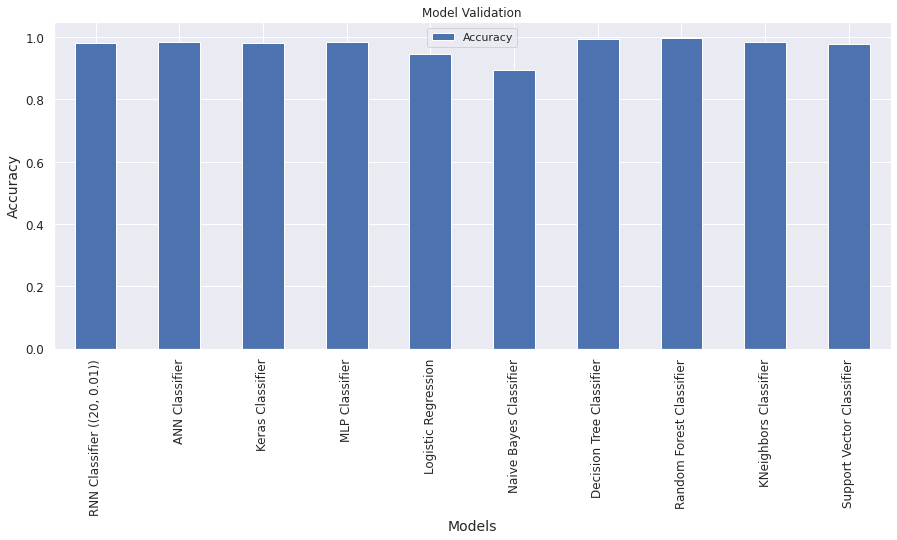

In [ ]:
df_val = pd.DataFrame(acc_score_validation[1:],columns=['Model','Accuracy'],index=df['Model'])
ax = df_val.plot(kind='bar', title='Model Validation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()